(6500, 5)
    pl   pw   sl   sw  id
0  5.0  3.5  1.3  0.3   1
1  4.8  3.0  1.4  0.2   2
2  4.7  3.2  1.3  0.2   3
3  4.6  3.2  1.5  0.2   4
4  4.9  3.4  1.3  0.2   5


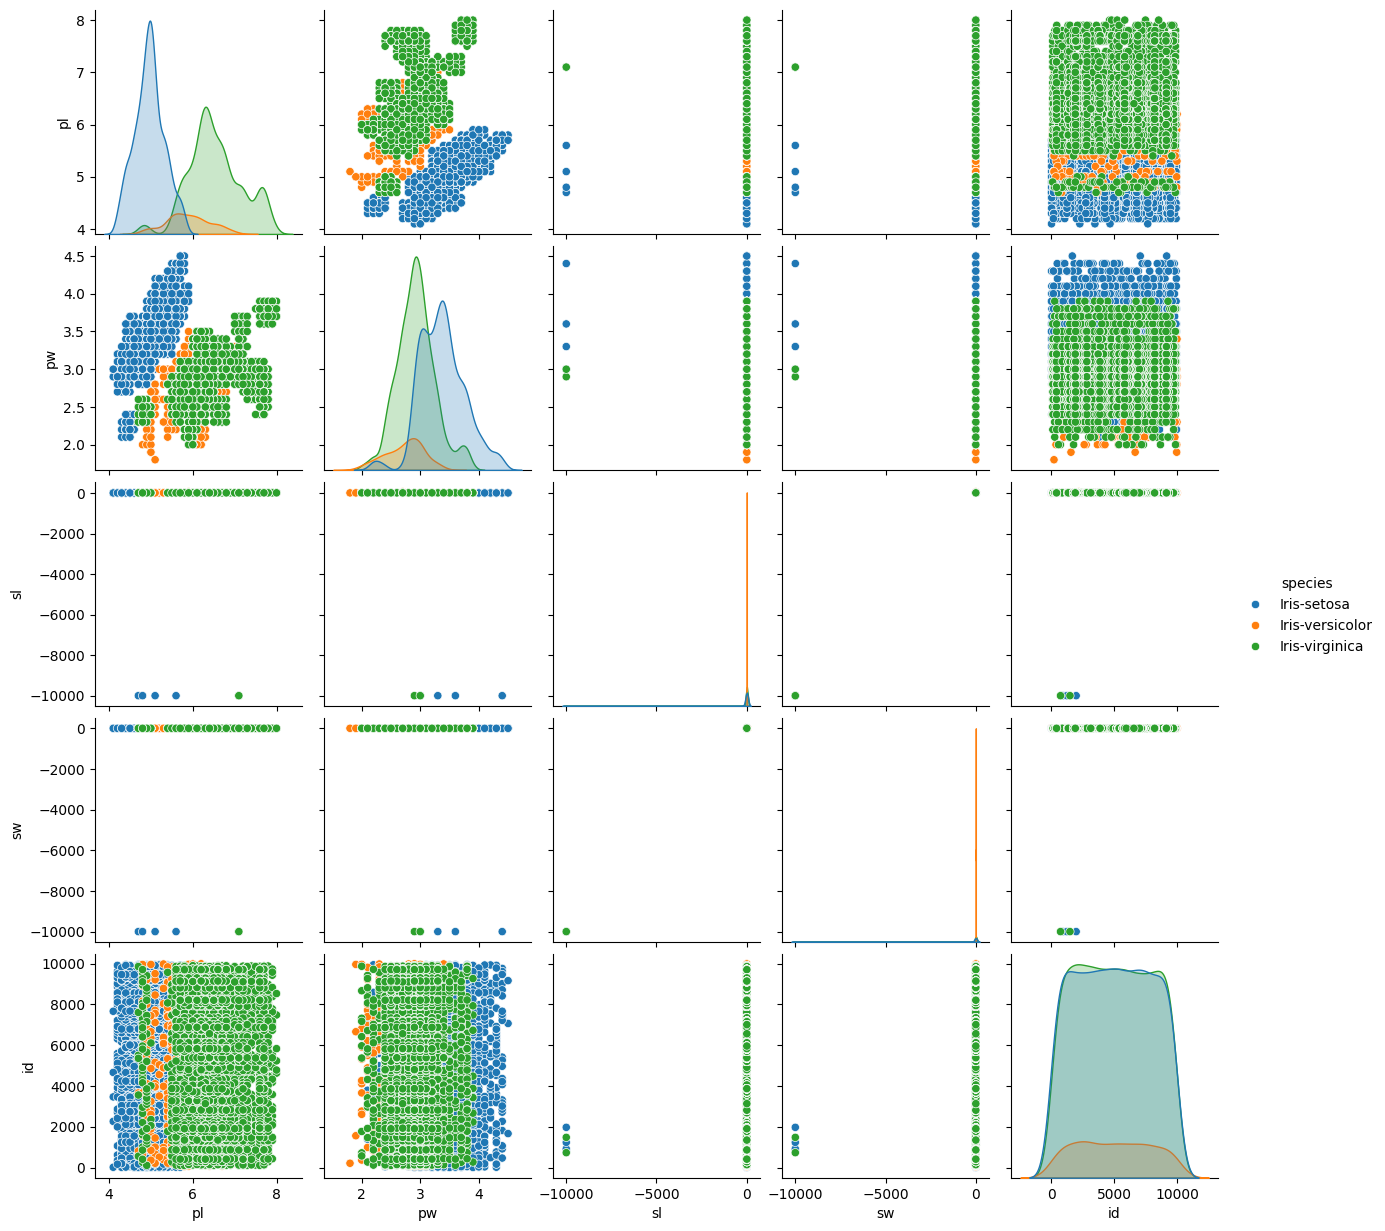

In [20]:
# Task 1
import pandas as pd
import numpy as np
data = pd.read_csv("iris_data.csv", delimiter=";")
labels = pd.read_csv("iris_labels.csv", delimiter=";")

print(data.shape)
print(data.head())

data = pd.merge(data , labels , on="id", how="inner")

data.drop(["examiner"], axis=1, inplace=True)

data = data.sort_values("species")

import seaborn as sns
sns.pairplot(data , hue="species")

In [21]:
# Task 2

print(data.value_counts("species"))
print(data.groupby("species").count())

species
Iris-setosa        3000
Iris-virginica     3000
Iris-versicolor     500
Name: count, dtype: int64
                   pl    pw    sl    sw    id
species                                      
Iris-setosa      3000  3000  3000  3000  3000
Iris-versicolor   500   500   500   500   500
Iris-virginica   3000  3000  3000  3000  3000


       pl   pw   sl   sw    id      species
0     5.0  3.5  1.3  0.3     1  Iris-setosa
3542  4.8  2.9  1.3  0.2  5402  Iris-setosa
3543  4.8  3.1  1.1  0.3  5403  Iris-setosa
3544  5.0  3.6  1.3  0.2  5405  Iris-setosa
3545  5.5  3.7  1.7  0.5  5406  Iris-setosa


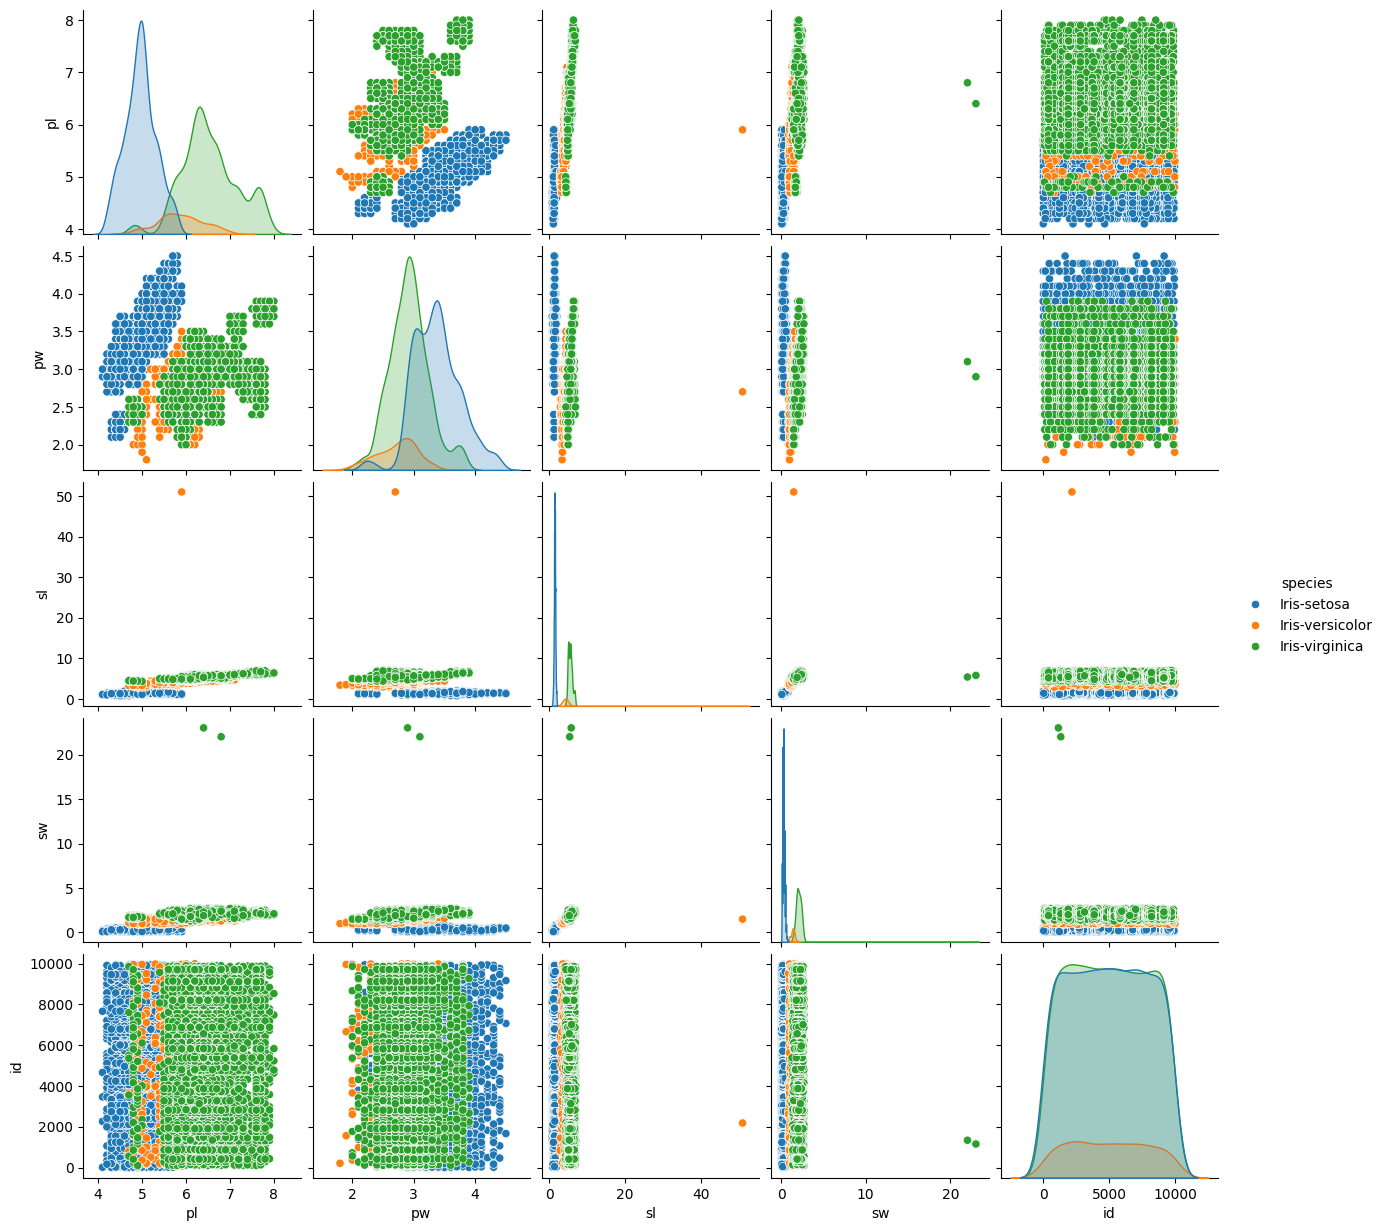

In [22]:
# Task 3


print(data.head())
data = data[data["pl"] != -9999]
data = data[data["pw"] != -9999]
data = data[data["sl"] != -9999]
data = data[data["sw"] != -9999]

sns.pairplot(data , hue="species")


In [ ]:
# Task 4

numerical_features = data[['pl', 'pw', 'sl', 'sw']]
# 4.1
from sklearn.preprocessing import MinMaxScaler
minmax_scaled = MinMaxScaler().fit_transform(numerical_features)

# 4.2
from sklearn.preprocessing import StandardScaler
sd_scaled = StandardScaler().fit_transform(numerical_features)

# 4.3
from sklearn.decomposition import PCA
pca = PCA()
principal_components = pca.fit_transform(numerical_features)
print(principal_components)
print("Explained variance per feature:")
print(pca.explained_variance_ratio_)
print("So to retain at least 95% of the variance we need the first retain the first two principal components: 0.91329008 + 0.04017737 = 0.95346745 = 95.34%")


# 4.4
print("PCA Mean: ")
print(pd.DataFrame(pca.components_ , columns =["Sepal L", "Sepal W", "Petal L", "Petal W"], index=["PC 1","PC 2","PC 3","PC 4"]).abs().mean(axis=0))

# 4.5
modified_dataset_scaled = pd.DataFrame(minmax_scaled, columns=["Sepal L", "Sepal W", "Petal L", "Petal W"])
modified_dataset_scaled['pl'] = modified_dataset_scaled['Petal L'] * 100.0
principal_components_scaled = pca.fit_transform(modified_dataset_scaled)
print(principal_components_scaled)
print("Modified Dataset Mean: ")
print(pd.DataFrame(pca.components_ , columns =["Sepal L", "Sepal W", "Petal L", "Petal W"], index=["PC 1","PC 2","PC 3","PC 4"]).abs().mean(axis=0))

# 4.6
modified_dataset_outlier = pd.DataFrame(pca.components_ , columns =["Sepal L", "Sepal W", "Petal L", "Petal W"], index=["PC 1","PC 2","PC 3","PC 4"])
modified_dataset_outlier.loc[0, "Petal L"] = 5000
print("Modified Dataset with Outlier Mean: ")
print(modified_dataset_outlier.mean(axis=0))




       pl   pw   sl   sw
0     5.0  3.5  1.3  0.3
3542  4.8  2.9  1.3  0.2
3543  4.8  3.1  1.1  0.3
3544  5.0  3.6  1.3  0.2
3545  5.5  3.7  1.7  0.5
...   ...  ...  ...  ...
3817  7.3  2.7  6.2  1.9
3818  8.0  3.8  6.4  2.1
3819  6.4  2.7  5.6  2.3
3891  7.1  3.4  6.0  2.4
4279  6.4  2.7  5.3  1.9

[6494 rows x 4 columns]
[[-2.5415313   0.19744875 -0.01499683  0.08797746]
 [-2.59897427 -0.32060579 -0.04178496 -0.28297024]
 [-2.75198157 -0.14284286  0.10554679 -0.16772068]
 ...
 [ 2.43688895 -0.25481236  0.25970566 -0.07117731]
 [ 3.0027377   0.59545206  0.08196667  0.2031846 ]
 [ 2.03380798 -0.19624631 -0.0095211  -0.17893956]]
Explained variance per feature:
[0.91329008 0.04017737 0.03231569 0.01421686]
So to retain at least 95% of the variance we need the first retain the first two principal components: 0.91329008 + 0.04017737 = 0.95346745 = 95.34%
PCA Mean: 
Sepal L    0.441237
Sepal W    0.385186
Petal L    0.430356
Petal W    0.353662
dtype: float64
[[0.23076923 0.62962963 0.0099

ValueError: Shape of passed values is (5, 5), indices imply (4, 4)